# Статистический анализ данных

<a id="task"></a>
## Постановка задачи

Тема проекта: "Статистический анализ данных сервиса аренды самокатов GoFast".

### Назначение

**Цель:** Проанализировать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.

### Структура проекта

1. [Постановка задачи][1]
    1. Назначение
    2. Структура проекта
    3. Описание данных
        1. Пользователи
        2. Поездки
        3. Подписки
2. [Общая информация о данных][2]
    1. [Загрузка данных][2.1]
    2. [Изучение общей информации][2.2]
3. [Предобработка данных][3]
    1. [Изменение типа данных][3.1]
    2. [Новый столбец с номером месяца][3.2]
    3. [Дубликаты и пропуски][3.3]
4. [Исследовательский анализ данных][4]
    1. [Частота встречаемости городов][4.1]
    2. [Соотношение пользователей с подпиской и без подписки][4.2]
    3. [Возраст пользователей][4.3]
    4. [Расстояние, которое пользователь преодолел за одну поездку][4.4]
    5. [Продолжительность поездок][4.5]
5. [Объединение данных][5]
    1. [Объединение данные о пользователях, поездках и подписках в один датафрейм][5.1]
    2. [Дополнительные датафреймы с подписками][5.2]
    3. [Визуализация расстояния и времени поездок для датафреймов с подписками][5.3]
6. [Подсчёт выручки][6]
7. [Проверка гипотез][7]
8. [Распределения][8]
9. [Общие выводы][9]

[1]:#task
[2]:#general
[2.1]:#load
[2.2]:#info
[3]:#preprocess
[3.1]:#type
[3.2]:#column
[3.3]:#dupl
[4]:#research
[4.1]:#cities
[4.2]:#subs_rel
[4.3]:#age
[4.4]:#dist
[4.5]:#dur
[5]:#merge
[5.1]:#join_all
[5.2]:#sub_df
[5.3]:#visual
[6]:#count
[7]:#hypo
[8]:#distrib
[9]:#fin

### Описание данных

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках.

#### Пользователи -  users_go.csv

- user_id: уникальный идентификатор пользователя
- name:	имя пользователя
- age: возраст
- city:	город
- subscription_type: тип подписки (free, ultra)

#### Поездки - rides_go.csv

- user_id: уникальный идентификатор пользователя
- distance: расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration: продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date: дата совершения поездки

#### Подписки - subscriptions_go.csv

- subscription_type: тип подписки
- minute_price: стоимость одной минуты поездки по данной подписке
- start_ride_price: стоимость начала поездки
- subscription_fee: стоимость ежемесячного платежа

<a id="general"></a>
## Общая информация о данных

<a id="load"></a>
### Загрузка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
from math import sqrt, factorial
import matplotlib.pyplot as plt
#игнорируем предупреждение
import warnings
warnings.simplefilter("ignore", UserWarning)
import numpy as np
from scipy import stats as st
from scipy.stats import binom, poisson, norm

Считываем файлы и сохраняем в датафреймы.

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv', sep=',')
    data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
    data_subs = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    data_users = pd.read_csv('/users_go.csv', sep=',')
    data_rides = pd.read_csv('/rides_go.csv', sep=',')
    data_subs = pd.read_csv('/subscriptions_go.csv', sep=',')

<a id="info"></a>
### Изучение общей информации

#### Пользователи

Выводим первые 10 строк датафрейма с информацией о пользователях.

In [3]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Выводим основную информацию о датафрейме.

In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Все типы данных в датафрейме `data_users` - правильные, пропусков нет, всего - 1565 записей.

#### Поездки

Выводим первые 10 строк датафрейма с информацией о поездках.

In [5]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Выводим основную информацию о датафрейме.

In [6]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Столбец `date` будет необходимо перевести в тип данных datetime, пропусков нет, всего 18068 записей в датафрейме.

#### Подписки

Выводим строки датафрейма с информацией о подписках.

In [7]:
data_subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Выводим основную информацию о датафрейме.

In [8]:
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Всего есть два типа подписки, типы данных правильные.

**Вывод:** 
- датафрейм `data_users` содержит информацию о пользователях. Типы данных все правильные, пропусков в столбцах нет. Содержит 1565 записей.
- датафрейм `data_rides` содержит информацию о поездках. Столбец `date` необходимо привести к типу datetime, пропуски отсутствуют. Всего в датафрейме 18068 записей.
- датафрейм `data_subs` содержит информацию о видах подписок. Типы данных правильные, пропусков нет, всего 2 записи.

<a id="preprocess"></a>
## Предобработка данных

<a id="type"></a>
### Изменение типа данных

Приведем столбец `date` датафрейма `data_rides` к типу datetime.

In [9]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

Проверяем столбец.

In [10]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


<a id="column"></a>
### Новый столбец с номером месяца

Проверим год, за который хранятся данные.

In [11]:
data_rides['date'].dt.year.unique()

array([2021])

В датафрейме поездок есть данные только за 2021 год. Создаем новый столбец с номером месяца.

In [12]:
data_rides['month'] = data_rides['date'].dt.month

Проверяем.

In [13]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<a id="dupl"></a>
### Дубликаты и пропуски

Проверяем наличие пропусков.

In [14]:
print('Таблица пользователей')
print(data_users.isna().sum())
print()
print('Таблица поездок')
print(data_rides.isna().sum())
print()
print('Таблица подписок')
print(data_subs.isna().sum())

Таблица пользователей
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Таблица поездок
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Таблица подписок
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Проверяем наличие явных дубликатов.

In [15]:
print('Кол-во дублей в data_users:', data_users.duplicated().sum())
print('Кол-во дублей в data_rides:', data_rides.duplicated().sum())
print('Кол-во дублей в data_subs:', data_subs.duplicated().sum())

Кол-во дублей в data_users: 31
Кол-во дублей в data_rides: 0
Кол-во дублей в data_subs: 0


Удаляем явные дубликаты в датафрейме `data_users` и сразу проверяем.

In [16]:
data_users = data_users.drop_duplicates().reset_index(drop=True)
print('Кол-во дублей в data_users:', data_users.duplicated().sum())

Кол-во дублей в data_users: 0


Проверим на наличие неявных дубликатов в столбце `city` датафрейма `data_users`.

In [17]:
print('Всего уникальных значений городов:', len(data_users['city'].unique()))

Всего уникальных значений городов: 8


In [18]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты отсутствуют.

**Вывод:** В результате предобработки данных тип данных столбца `date` датафрейма `data_rides` был изменен на тип datetime, также в этот датафрейм добавлен столбец с номером месяца `month`. Удален 31 дубликат в `data_users`. Пропусков и неявных дубликатов не обнаружено.

<a id="research"></a>
## Исследовательский анализ данных

<a id="cities"></a>
### Частота встречаемости городов

In [19]:
user_city = data_users\
.pivot_table(index='city', values='user_id', aggfunc='count')\
.sort_values(by='user_id', ascending=True)
user_city

,user_id
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


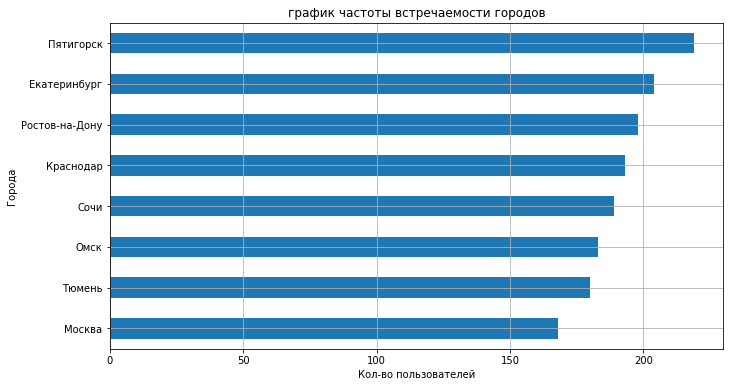

In [20]:
user_city.plot(
    kind='barh',
    grid=True, 
    figsize=(11, 6), 
    title='график частоты встречаемости городов',
    legend=None
)
plt.ylabel('Города')
plt.xlabel('Кол-во пользователей')
plt.show()

**Вывод:** данные есть по восьми городам. Больше всего пользователей из Пятигорска и Екатеринбурга, меньше всего из Москвы и Тюмени.

<a id="subs_rel"></a>
### Соотношение пользователей с подпиской и без подписки

In [21]:
user_subs = data_users\
.pivot_table(index='subscription_type', values='user_id', aggfunc='count')\
.sort_values(by='user_id', ascending=True)
user_subs

,user_id
subscription_type,
ultra,699
free,835


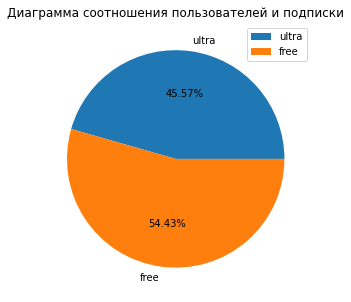

In [22]:
user_subs.plot(
    y='user_id', 
    kind='pie', 
    autopct='%.2f%%', 
    figsize=(7,5),
    title='Диаграмма соотношения пользователей и подписки'
)
plt.ylabel('');

**Вывод:** пользователей без подписки больше чем пользователей с подпиской ultra на 8.86 процентных пункта.

<a id="age"></a>
### Возраст пользователей

In [23]:
user_age = data_users\
.pivot_table(index='age', values='user_id', aggfunc='count')\
.sort_values(by='age', ascending=True)
user_age.head(10)

,user_id
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


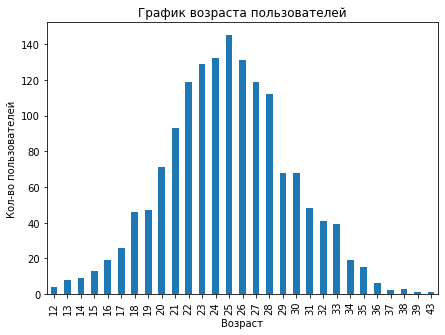

In [24]:
user_age.plot(
    y='user_id', 
    kind='bar', 
    figsize=(7,5),
    title='График возраста пользователей',
    legend=None
)
plt.ylabel('Кол-во пользователей')
plt.xlabel('Возраст')
plt.show()

In [25]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод:** выборка пользователей по возрасту имеет нормальное распределение. Медиана и средний возраст почти одинаковы и равняются 25 годам.

<a id='dist'></a>
### Расстояние, которое пользователь преодолел за одну поездку

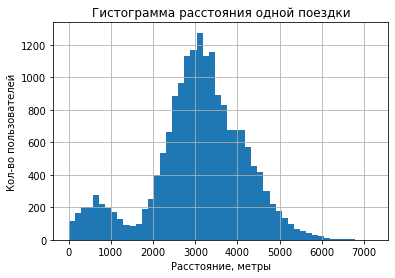

In [26]:
data_rides['distance'].hist(bins=50);
plt.title('Гистограмма расстояния одной поездки')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Расстояние, метры')
plt.show()

In [27]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [28]:
data_rides[data_rides['distance'] <= 50]

,user_id,distance,duration,date,month
6611,707,28.793204,14.143966,2021-09-12,9
6691,712,23.963062,2.053251,2021-11-22,11
6850,724,30.473763,3.166221,2021-05-09,5
7389,762,35.061903,7.087655,2021-05-27,5
7841,796,7.097072,10.026614,2021-11-26,11
8324,835,12.233115,4.034952,2021-09-19,9
8658,861,6.784447,6.015656,2021-07-21,7
8906,880,11.283615,2.035632,2021-03-28,3
9128,896,31.803410,8.079509,2021-03-16,3
9439,918,38.711151,11.165905,2021-06-08,6


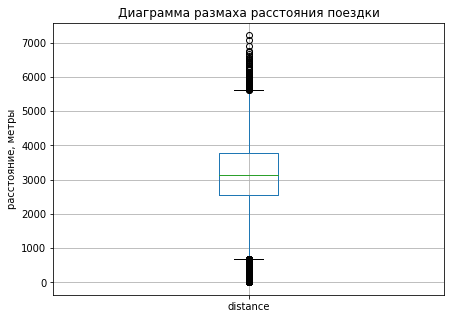

In [29]:
data_rides.boxplot('distance', figsize=(7,5))
plt.title('Диаграмма размаха расстояния поездки')
plt.ylabel('расстояние, метры')
plt.show()

**Вывод:** среднее расстояние поездок - около 3 километров. Также есть всплеск около 600-700 метровых поездок. Возможно, это пользователи, которые пытаются успеть на общественный траспорт или с общественного транспорта в точку назначения (например, на работу).

Есть несколько очень кородких по расстоянию поездок временем от 2-3 до 14-15 минут. Причиной таких коротких поездок можно предположить желание успеть на общественный транспорт, отмену поездки из-за плохого состояния самоката (возможно, пользователь тут же взял другой самокат) или сложность в понимании эксплуатации самоката.

<a id="dur"></a>
### Продолжительность поездок

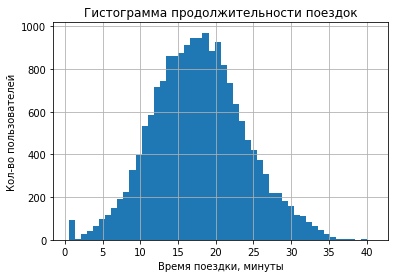

In [30]:
data_rides['duration'].hist(bins=50);
plt.title('Гистограмма продолжительности поездок')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время поездки, минуты')
plt.show()

In [31]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

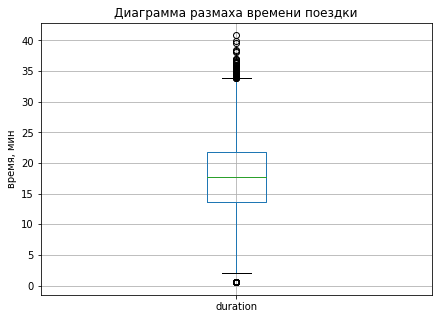

In [32]:
data_rides.boxplot('duration', figsize=(7,5))
plt.title('Диаграмма размаха времени поездки')
plt.ylabel('время, мин')
plt.show()

In [33]:
data_rides[data_rides['duration'] > 36]

,user_id,distance,duration,date,month
143,15,4187.621459,38.125729,2021-01-13,1
499,55,4151.081878,36.906491,2021-06-30,6
1694,183,4473.798120,36.402535,2021-01-02,1
1894,205,4218.386189,36.310317,2021-08-26,8
1998,216,4831.339954,38.352763,2021-05-11,5
2279,243,3915.218384,36.491310,2021-12-30,12
2623,278,4754.433686,39.526602,2021-12-02,12
3729,401,4002.356795,37.014141,2021-09-21,9
4215,454,5137.327103,40.823963,2021-12-27,12
4653,501,4103.765788,36.622595,2021-05-24,5


Ограничение по скорости электросамокатов в городе 25 км./ч. Получается примерно 415 м./мин.

Возьмем среднюю скорость `200*30=6000` метров за полчаса. Значит, расстояние менее 6 км. за 30-40 минут - нормальные данные.

In [34]:
data_rides[data_rides['distance'] >= 6500]

,user_id,distance,duration,date,month
10341,981,6671.969833,27.297078,2021-12-06,12
10915,1022,6535.386520,30.008799,2021-10-14,10
11319,1052,6503.600402,26.008309,2021-07-01,7
11385,1057,6601.197575,0.500000,2021-02-07,2
12086,1108,6538.937375,29.649276,2021-09-27,9
15580,1361,6908.491343,23.816983,2021-03-27,3
16309,1411,7211.007745,0.500000,2021-04-15,4
16484,1422,7066.003772,23.619318,2021-02-12,2
17171,1471,6760.940067,32.043760,2021-08-03,8
17242,1477,6724.932981,0.500000,2021-01-12,1


In [35]:
check = data_rides[data_rides['distance'] >= 2000]
check = check[check['duration'] <= 5]
check

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [36]:
print('Процент поездок короче 5 мин. но проехавших больше 2 км равен ', 
      '{:.2%}'.format(len(check) / len(data_rides)))

Процент поездок короче 5 мин. но проехавших больше 2 км равен  0.53%


Преодолеть около 4-6 км меньше чем за минуту - невозможно. 4-7 км за 20-50 минут - реалистичное значение. Трудно сказать, как должны выглядеть данные: мы не можем утверждать, что все записи с большой дистанцией и временем поездки 0.500000 минут - это ошибочно записанные в часах 30 минут ровно, ни больше ни меньше.
К сожалению, выручка подсчитывается по времени поездки, а не по дистанции, поэтому, в зависимости от наличия или отсутствия подписки, такие поездки будут стоить всего 6 или 58 рублей.

Время поездки явно высчитывается автоматически, поэтому причиной таких записей, скорее всего, стала техническая ошибка, например, при сохранении или неисправность при получении данных. 

За неимением логических вариантов исправления аномальных данных, принято решение удалить данные (такие записи составляют 0.53% от всего датафрейма), чтобы не испортить последующие исследования.

In [37]:
data_rides = data_rides.loc[~((data_rides['distance'] >= 2000) 
       & (data_rides['duration'] <= 5)),:]
len(data_rides)

17973

Проверяем данные.

In [38]:
data_rides['duration'].min()

2.0356324681963884

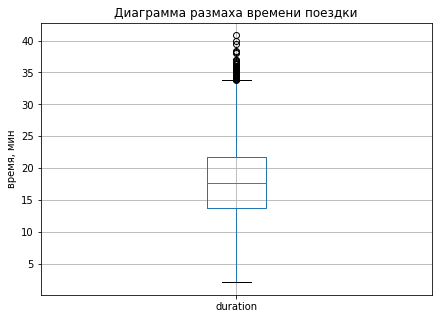

In [39]:
data_rides.boxplot('duration', figsize=(7,5))
plt.title('Диаграмма размаха времени поездки')
plt.ylabel('время, мин')
plt.show()


**Вывод:** средняя продолжительность поездки составляет 17-18 минут. Выборка имеет нормальное распределение. 
Найдены аномальные значения - продолжительность поездки 50 секунд с расстоянием несколько километров. Скорее всего, такие данные появились из-за технической ошибки. Так как такие записи составляли 0.53% от всего датафрейма, они были удалены.

**Общий вывод:** в ходе исследовательского анализа данных были изучены значения получены следующие выводы
- Сервис самокатов представлен в вросьми городах России. Больше всего пользователей из Пятигорска и Екатеринбурга, меньше всего из Москвы и Тюмени.
- Пользователей **без** подписки больше, чем пользователей с подпиской ultra на 8.86 процентных пункта.
- Средний возраст пользователя - 25 лет.
- Среднее расстояние поездок - около 3 километров. Также есть всплеск около 600-700 метровых поездок. Возможно, это пользователи, которые пытаются успеть на общественный траспорт или с общественного транспорта в точку назначения (например, от метро на работу). 
- Есть несколько очень кородких по расстоянию поездок временем от 2-3 до 14-15 минут. Причиной таких коротких поездок можно предположить желание успеть на общественный транспорт, отмену поездки из-за плохого состояния самоката (возможно, пользователь тут же взял другой самокат) или сложность в понимании эксплуатации самоката.
- Средняя продолжительность поездки составляет 17-18 минут.
- Найдены аномальные значения - продолжительность поездки 30 секунд с расстоянием несколько километров. Скорее всего, такие данные появились из-за технической ошибки. Так как такие записи составляли 0.53% от всего датафрейма, они были удалены.

<a id="merge"></a>
## Объединение данных

<a id="join_all"></a>
### Объединение данные о пользователях, поездках и подписках в один датафрейм

Объединим данные о пользователях, поездках и подписках в один датафрейм (`data`) с помощью метода `merge()`.

In [40]:
data = data_users.merge(data_rides, on='user_id', how='left')
# проверяем количество записей
print('Кол-во записей в data_users:', len(data_users))
print('Кол-во записей в data_rides:', len(data_rides))
print('Кол-во записей в data_subs:', len(data_subs))
print('Кол-во записей в data:', len(data))

Кол-во записей в data_users: 1534
Кол-во записей в data_rides: 17973
Кол-во записей в data_subs: 2
Кол-во записей в data: 17973


In [41]:
data = data.merge(data_subs, on='subscription_type', how='left')
# проверяем количество записей
print('Кол-во записей в data_rides:', len(data_rides))
print('Кол-во записей в data:', len(data))

Кол-во записей в data_rides: 17973
Кол-во записей в data: 17973


In [42]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [43]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [44]:
data.tail()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0
17972,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,8,50,0


**Вывод:** объединение прошло корректно, количество записей соответствует самому большому датафрейму. 

<a id="sub_df"></a>
### Дополнительные датафреймы с подписками

Создаем еще два датафрейма из `data`:
- с данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [45]:
sub_on = data[data['subscription_type'] == 'ultra']
sub_on.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [46]:
sub_not = data[data['subscription_type'] == 'free']
sub_not.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [47]:
print('Кол-во записей в data:', len(data))
print('Суммарное кол-во записей в sub_on и sub_not:', 
      len(sub_on) + len(sub_not))

Кол-во записей в data: 17973
Суммарное кол-во записей в sub_on и sub_not: 17973


<a id="visual"></a>
### Визуализация расстояния и времени поездок для датафреймов с подписками

Визуализируем информацию о расстоянии и времени поездок для пользователей с подпиской и без нее.

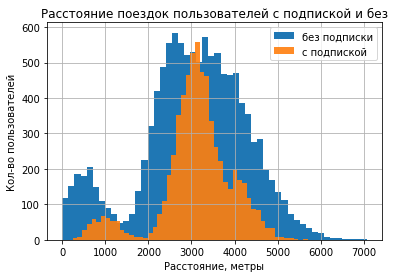

In [48]:
ax = sub_not.plot(
    kind='hist',
    y='distance',
    bins=50,
    alpha=1,
    label='без подписки'
)

sub_on.plot(
    kind='hist',
    y='distance',
    bins=50,
    alpha=.9,
    label='с подпиской',
    ax=ax,
    grid=True
)

plt.title('Расстояние поездок пользователей с подпиской и без')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Расстояние, метры')
plt.show()

In [49]:
print('Расстояние пользователей без подписки')
print(sub_not['distance'].describe())
print()
print('Расстояние пользователей с подпиской')
print(sub_on['distance'].describe())

Расстояние пользователей без подписки
count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

Расстояние пользователей с подпиской
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


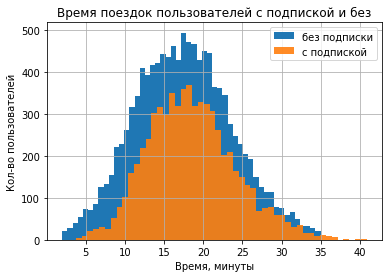

In [50]:
ax = sub_not.plot(
    kind='hist',
    y='duration',
    bins=50,
    alpha=1,
    label='без подписки'
)

sub_on.plot(
    kind='hist',
    y='duration',
    bins=50,
    alpha=.9,
    label='с подпиской',
    ax=ax,
    grid=True
)

plt.title('Время поездок пользователей с подпиской и без')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, минуты')
plt.show()

In [51]:
print('Вермя пользователей без подписки')
print(sub_not['duration'].describe())
print()
print('Вермя пользователей с подпиской')
print(sub_on['duration'].describe())

Вермя пользователей без подписки
count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

Вермя пользователей с подпиской
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


**Вывод:** в объединении данных был создан новый датафрейм `data`, объединяющий три основных (с информацией о пользователях, поездках и подписках). Также были созданы два датафрейма с пользователями без подписки и с пользователями с подпиской ultra. 
В результате визуализации данных о расстоянии и времени пользователей, разденных на категории "с подпиской" и "без подписки", были получены следующие данные:
- пользователей без подписки больше;
- больший диапазон расстояния у пользователей без подписки - 0.86-7066 м, у пользователей с подпиской - 244.21-5699.77 м;
- разброс по длительности поездок не сильно различается среди подписок, но у пользователей без подписки он чуть больше: 6.16 минут без подписки и 5.57 минут с подпиской;
- медиана по времени поездок среди пользователей без подписки составляет 17.38, у пользователей с подпиской медиана немного больше и составляет 18.18.

<a id="count"></a>
## Подсчёт выручки

Создаем датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найходим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [52]:
# огругляем общее время до целого
data['duration'] = np.ceil(data['duration'])\
.astype(int)

data_agg = data\
.pivot_table(
    index=['user_id', 'month'], 
    values=['duration', 'distance'],
    aggfunc={
        'duration': 'sum', 
        'distance': ['sum', 'count']
    }
)\
.reset_index()
#округляем представление чисел до двух знаков после запятой
pd.options.display.float_format ='{:.2f}'.format
#переименовываем столбцы для удобства
data_agg.columns = ['user_id', 'month', 'rides_count', 
                    'distance_sum', 'duration_sum']
data_agg.head()

,user_id,month,rides_count,distance_sum,duration_sum
0,1,1,2,7027.51,42
1,1,4,1,754.16,7
2,1,8,2,6723.47,46
3,1,10,2,5809.91,32
4,1,11,3,7003.50,56


Новые столбцы:
- `rides_count` - кол-во поездок за месяц;
- `distance_sum` - суммарное расстояние за месяц в метрах;
- `duration_sum` - суммарное время поездок за месяц в минутах.

In [53]:
# соединяем data_agg с инфо о пользователях
data_agg = data_users.merge(
    data_agg, 
    on='user_id',
    how='right'
)
# соединяем data_agg с инфо о подписках
data_agg = data_agg.merge(
    data_subs, 
    on='subscription_type',
    how='left'
)
 
data_agg

,user_id,name,age,city,subscription_type,month,rides_count,distance_sum,duration_sum,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,1,2,7027.51,42,6,0,199
1,1,Кира,22,Тюмень,ultra,4,1,754.16,7,6,0,199
2,1,Кира,22,Тюмень,ultra,8,2,6723.47,46,6,0,199
3,1,Кира,22,Тюмень,ultra,10,2,5809.91,32,6,0,199
4,1,Кира,22,Тюмень,ultra,11,3,7003.50,56,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11295,1534,Альберт,25,Краснодар,free,6,2,3409.47,26,8,50,0
11296,1534,Альберт,25,Краснодар,free,8,2,7622.45,48,8,50,0
11297,1534,Альберт,25,Краснодар,free,9,1,4928.17,23,8,50,0
11298,1534,Альберт,25,Краснодар,free,11,4,13350.02,78,8,50,0


В этот же датафрейм дабвляем столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обращаемся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

**Помесячная выручка считается по формуле:** стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [54]:
data_agg['revenue'] = (
    data_agg['start_ride_price'] * data_agg['rides_count']
    + data_agg['minute_price'] * data_agg['duration_sum'] 
    + data_agg['subscription_fee']
)

data_agg

,user_id,name,age,city,subscription_type,month,rides_count,distance_sum,duration_sum,minute_price,start_ride_price,subscription_fee,revenue
0,1,Кира,22,Тюмень,ultra,1,2,7027.51,42,6,0,199,451
1,1,Кира,22,Тюмень,ultra,4,1,754.16,7,6,0,199,241
2,1,Кира,22,Тюмень,ultra,8,2,6723.47,46,6,0,199,475
3,1,Кира,22,Тюмень,ultra,10,2,5809.91,32,6,0,199,391
4,1,Кира,22,Тюмень,ultra,11,3,7003.50,56,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,1534,Альберт,25,Краснодар,free,6,2,3409.47,26,8,50,0,308
11296,1534,Альберт,25,Краснодар,free,8,2,7622.45,48,8,50,0,484
11297,1534,Альберт,25,Краснодар,free,9,1,4928.17,23,8,50,0,234
11298,1534,Альберт,25,Краснодар,free,11,4,13350.02,78,8,50,0,824


**Вывод:** на данном этапе был создан датафрейм с агрегированными данными о поездках. 
- Найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 
- Округлены минуты поездок до целого числа.
- Посчитана помесячная выручка, которую принес каждый пользователь.

<a id="hypo"></a>
## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### 7.1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сравним две выборки `sub_on` и `sub_not` и проверим гипотезы:
- **Нулевая гипотеза:** среднее время продолжительности поездок среди пользователей с подпиской и без **одинаково**;
- **Альтернативная гипотеза:** среднее время продолжительности поездок среди пользователей **с подпиской больше**, чем среди пользователей без подписки.

In [55]:
print('Среднее время пользователей С ПОДПИСКОЙ:',\
      round(sub_on['duration'].mean(), 2))
print(f'Среднее время пользователей БЕЗ ПОДПИСКИ:',\
      round(sub_not['duration'].mean(), 2))

# выбранный уроваень статистической значимости
alpha = .05

results = st.ttest_ind(
    sub_on['duration'],
    sub_not['duration'],
    alternative='greater'
)

print('p-значение:', results.pvalue)

# вывод о нулевой гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время пользователей С ПОДПИСКОЙ: 18.54
Среднее время пользователей БЕЗ ПОДПИСКИ: 17.53
p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


**Вывод:** нулевая гипотеза о том, что среднее время продолжительности поездок среди пользователей с подпиской и без одинаково, - отвергнута. Есть основания утверждать, что верна альтернативная гипотеза - среднее время продолжительности поездок среди пользователей с подпиской больше, чем среди пользователей без подписки.

### 7.2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Сравним выборку `sub_on` с выбранным значением `3130` и проверим гипотезы:
- **Нулевая гипотеза:** среднее расстояние поездки среди пользователей с подпиской равно **3130** метров;
- **Альтернативная гипотеза:** среднее расстояние поездки среди пользователей с подпиской больше **3130** метров.

In [56]:
print('Среднее расстояние пользователей С ПОДПИСКОЙ:',\
      round(sub_on['distance'].mean(), 2))

# выбранный уроваень статистической значимости
alpha = .05
# выбранное в нулевой гипотезе число
value = 3130

results = st.ttest_1samp(
    sub_on['distance'],
    value,
    alternative='greater'
)

print('p-значение:', results.pvalue)

# вывод о нулевой гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние пользователей С ПОДПИСКОЙ: 3115.45
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** нулевую гипотезу нельзя отвергнуть - среднее расстояние пользователей с подпиской не превышает 3130 метров.

### 7.3

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сравним две выборки пользователей с подпиской и без подписки и проверим гипотезы:
- **Нулевая гипотеза:** помесячная выручка пользователей с и без подписки **равна**;
- **Альтернативная гипотеза:** помесячная выручка пользователей с подпиской **выше**, чем помесячная выручка пользователей без подписки.

In [57]:
print('Среднее выручка по пользователям С ПОДПИСКОЙ:',\
      round(data_agg\
            .loc[data_agg['subscription_type'] == 'ultra', 'revenue']\
            .mean(), 2))
print(f'Среднее выручка по пользователям БЕЗ ПОДПИСКИ:',\
      round(data_agg\
            .loc[data_agg['subscription_type'] == 'free', 'revenue']\
            .mean(), 2))

# выбранный уроваень статистической значимости
alpha = .05

results = st.ttest_ind(
    data_agg.loc[data_agg['subscription_type'] == 'ultra', 'revenue'],
    data_agg.loc[data_agg['subscription_type'] == 'free', 'revenue'],
    alternative='greater'
)

print('p-значение:', results.pvalue)

# вывод о нулевой гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выручка по пользователям С ПОДПИСКОЙ: 362.79
Среднее выручка по пользователям БЕЗ ПОДПИСКИ: 329.33
p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


**Вывод:** нулевая гипотеза о том, что помесячная выручка пользователей с и без подписки равна, - отвергнута. Есть основания утверждать, что верна альтернативная гипотеза - помесячная выручка выше среди пользователей с подпиской.

### 7.4

Представим такую ситуацию: 

техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест понадобился бы для проверки этой гипотезы? 

**Ответ:** для проверки данной гипотезы понадобился бы метод `scipy.stats.ttest_rel()`, принимающий в качестве аргументов две зависимые выборки одинакового размера до и после изменения.

Так как техническую команду интересует снижение количества обращений, следует использовать левосторонний тест (`alternative='less'`) - он проверит стало ли меньше среднее количество обращений в тех.поддержку после изменений. 

**Вывод:** в проверке гипотез получены следующие результаты
- среднее время продолжительности поездок среди пользователей с подпиской больше, чем среди пользователей без подписки.
- среднее расстояние пользователей с подпиской не превышает оптимальные с точки зрения износа самоката 3130 метров.
- помесячная выручка выше среди пользователей с подпиской.

Получается, что пользователи с подпиской "выгоднее" для компании.

<a id="distrib"></a>
## Распределения

### 7.1

Отделу маркетинга GoFast поставили задачу: 

нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода **подписку продлевают 10%** пользователей. Выясните, какое **минимальное количество промокодов** нужно разослать, чтобы вероятность не выполнить план была примерно **5%**. 

Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

Построим график биноминального распределения и определим примерный диапазон необходимого значения.

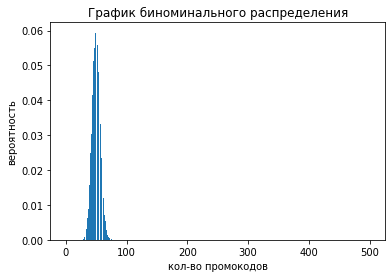

In [58]:
# вероятность успеха
p = .1
# кол-во испытаний
n = 500
distr = []

for k in range(0, n + 1):
   current_value = binom.pmf(k, n, p)
   distr.append(current_value)
plt.bar(range(0, n + 1), distr);

plt.title('График биноминального распределения')
plt.ylabel('вероятность')
plt.xlabel('кол-во промокодов')
plt.show()

При 500 промокодах велика вероятность получить менее 100 подписок (если точнее - где-то около 60-ти).

Найдем с помощью кумулятивной функции распределения вероятность, что случайная величина (кол-во успешных подписок) примет значение не менее 100.

In [59]:
# минимальное кол-во успехов
k = 99

# перибераем минимальное необходимое кол-во промокодов,
# при котором оформят подмиску не менее 100 пользователей
for n in range(500, 2000):
    if binom.cdf(k, n, p) <= 0.05:
        print('Вероятность успеха:', 1-binom.cdf(k, n, p))
        print('Минимальное кол-во промокодов:', n)
        # выходим из цикла как только встретим условие
        break

Вероятность успеха: 0.9502390990500975
Минимальное кол-во промокодов: 1161


**Вывод:** с помощью кумулятивной функции распределения, мы выяснили, что если вероятность продления подписки составляет 10%, а минимально-необходимое количество продливших подписку - 100 клиентов, то с вероятностью 95% план будет успешным при раздаче 1161 промокода или более.

### 7.2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. 
Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

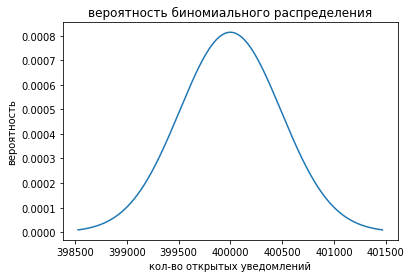

In [60]:
# задаём параметры биномиального распределения
n = 1000000
p = .4


# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 3 ст.отклонения бином.распределения
# до n*p плюс 3 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 3 * sqrt(n * p * (1 - p)))
right = int(n * p + 3 * sqrt(n * p * (1 - p)))


# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))

# рисуем график биномиального распределения
ax = plt.subplot()
ax.plot(x, binom.pmf(x, n, p))
plt.title('вероятность биномиального распределения')
plt.ylabel('вероятность')
plt.xlabel('кол-во открытых уведомлений')
plt.show()

In [61]:
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))


# задаём нормальное распределение
distr = st.norm(mu, sigma)


# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(result)

0.15371708296369768


**Вывод:** если 40% клиентов открывают уведолнеие, то вероятность, что из 1 млн разосланных уведомлений откроют менее 399,5 тысяч раз, равна 15%.

<a id="fin"></a>
## Общие выводы

В результате выполнения статистического анализа данных сервиса аренды самокатов GoFast были изучены датафреймы и проведена **предобработка данных:**
- датафрейм `data_users` содержит информацию о пользователях. Типы данных все правильные, пропусков и дубликатов в столбцах нет. Удален 31 явный дубликат. Содержит 1534 записей.
- датафрейм `data_ride`s содержит информацию о поездках. Столбец `date` приведен к типу `datetime`, пропуски и дубликаты отсутствуют. Всего в датафрейме 18068 записей.
- в этот датафрейм был добавлен столбец с номером месяца - `month`.
- датафрейм `data_subs` содержит информацию о видах подписок. Типы данных правильные, пропусков и дубликатов нет, всего 2 записи.

В ходе **исследовательского анализа данных** были изучены значения и получены следующие выводы:
- Сервис самокатов представлен в восьми городах России. Больше всего пользователей из Пятигорска и Екатеринбурга, меньше всего из Москвы и Тюмени.
- Пользователей без подписки больше, чем пользователей с подпиской ultra на 8.86 процентных пункта.
- Средний возраст пользователя - 25 лет.
- Среднее расстояние поездок - около 3 километров. Также есть всплеск около 600-700 метровых поездок. Возможно, это пользователи, которые пытаются успеть на общественный траспорт или с общественного транспорта в точку назначения (например, от метро на работу). 
- Есть несколько очень кородких по расстоянию поездок временем от 2-3 до 14-15 минут. Причиной таких коротких поездок можно предположить желание успеть на общественный транспорт, отмену поездки из-за плохого состояния самоката (возможно, пользователь тут же взял другой самокат) или сложность в понимании эксплуатации самоката.
- Средняя продолжительность поездки составляет 17-18 минут.
- Найдены аномальные значения - продолжительность поездки 30 секунд с расстоянием несколько километров. Скорее всего, такие данные появились из-за технической ошибки. За неимением логических вариантов исправления аномальных данных, принято решение удалить данные (такие записи составляют 0.53% от всего датафрейма), чтобы не испортить последующие исследования.

Далее проведено **объединение данных:**
- создан новый датафрейм `data`, объединяющий три основных (с информацией о пользователях, поездках и подписках). Также были созданы два датафрейма с пользователями без подписки и с пользователями с подпиской `ultra`. 

В результате визуализации данных о расстоянии и времени пользователей, разденных на категории "с подпиской" и "без подписки", были получены следующие выводы:

- пользователей без подписки больше;
- больший диапазон расстояния у пользователей без подписки - 0.86-7066 м, у пользователей с подпиской - 244.21-5699.77 м;
- разброс по длительности поездок не сильно различается среди подписок, но у пользователей без подписки он чуть больше: 6.16 минут без подписки и 5.57 минут с подпиской;
- медиана по времени поездок среди пользователей без подписки составляет 17.38, у пользователей с подпиской медиана немного больше и составляет 18.18.

При **подсчете выручки** 
- Создан датафрейм с агрегированными данными о поездках.
- Найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Округлены минуты поездок до целого числа.
- Посчитана помесячная выручка, которую принес каждый пользователь.

В ходе **проверки гипотез** получены следующие данные:
- среднее время продолжительности поездок среди пользователей с подпиской больше, чем среди пользователей без подписки.
- среднее расстояние пользователей с подпиской не превышает оптимальные с точки зрения износа самоката 3130 метров.
- помесячная выручка выше среди пользователей с подпиской.

Получается, что пользователи с подпиской "выгоднее" для компании.

Построение **распределений** показало, что:
- если вероятность продления подписки составляет 10%, а минимально-необходимое количество продливших подписку - 100 клиентов, то с вероятностью 95% план будет успешным при раздаче 1161 промокода или более.
- если 40% клиентов открывают уведолнеие, то вероятность, что из 1 млн разосланных уведомлений откроют менее 399,5 тысяч раз, равна 15%.